# Lesson 06 Assignment

In this assignment, we want to read the `retail-churn.csv` dataset that we examined in a previous assignment and begin to pre-process it. The goal of the assignment is to become familiar with some common pre-processing and feature engineering steps by implementing them.

In [1]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

col_names = ['user_id', 'gender', 'address', 'store_id', 'trans_id', 'timestamp', 'item_id', 'quantity', 'dollar']
churn = pd.read_csv("retail-churn.csv", sep = ",", skiprows = 1, names = col_names)

### Some basic EDA
present the first few rows and use pandas' `describe` to get an overview of the data
<br/>&nbsp;&nbsp;<span style="color:red" float:right>[0 point]</span>

In [3]:
churn.head()

,user_id,gender,address,store_id,trans_id,timestamp,item_id,quantity,dollar
0,101981,F,E,2860,818463,11/1/2000 0:00,4.710000e+12,1,37
1,101981,F,E,2861,818464,11/1/2000 0:00,4.710000e+12,1,17
2,101981,F,E,2862,818465,11/1/2000 0:00,4.710000e+12,1,23
3,101981,F,E,2863,818466,11/1/2000 0:00,4.710000e+12,1,41
4,101981,F,E,2864,818467,11/1/2000 0:00,4.710000e+12,8,288


In [4]:
churn.describe()

,user_id,store_id,trans_id,item_id,quantity,dollar
count,2.522040e+05,252204.000000,2.522040e+05,2.522040e+05,252204.000000,252204.000000
mean,1.395660e+06,126101.500000,1.229771e+06,4.467833e+12,1.385692,130.911389
std,6.094769e+05,72805.167983,2.350992e+05,1.679512e+12,3.705732,388.142169
min,1.113000e+03,0.000000,8.177470e+05,2.000882e+07,1.000000,1.000000
25%,9.937150e+05,63050.750000,1.025926e+06,4.710000e+12,1.000000,42.000000
50%,1.586046e+06,126101.500000,1.233476e+06,4.710000e+12,1.000000,76.000000
75%,1.862232e+06,189152.250000,1.433222e+06,4.710000e+12,1.000000,132.000000
max,2.179605e+06,252203.000000,1.635482e+06,9.790000e+12,1200.000000,70589.000000


The new data frame will be called `churn_processed`, which stores the pre-processed columns as you run through each of the these steps. You will need to make sure your columns are properly named.

1. Cast the `timestamp` column in churn into a column of type `datetime` and put the column into the `churn_processed` dataframe.  The new column should also be named `timestamp`.  Extract two new columns from `timestamp`: `dow` is the day of the week and `month` is the month of the year. Then drop the `timestamp` column from `churn_processed`.  Present the first few rows of `churn_processed`.
<br/>&nbsp;&nbsp;<span style="color:red" float:right>[2 point]</span>

In [37]:
from datetime import datetime as dt

# Create the new (empty) data frame, called churn_processed
churn_processed = pd.DataFrame()

# Cast timestamp to datetime
churn['timestamp'] = churn['timestamp'].astype('datetime64')

# Add timestamp to new dataframe (churn_processed)
churn_processed = churn_processed.assign(timestamp=churn['timestamp'])

# Create a dow column
churn_processed['dow'] = churn['timestamp'].dt.strftime('%A')
# churn_processed['dow'] = churn['timestamp'].dt.dayofweek

# Create a month column
churn_processed['month'] = churn['timestamp'].dt.strftime('%b')
#churn_processed['month'] = churn['timestamp'].dt.month

# Drop Timestamp
churn_processed = churn_processed.drop('timestamp', axis=1)

# See what we have
churn_processed.head()

,dow,month
0,Wednesday,Nov
1,Wednesday,Nov
2,Wednesday,Nov
3,Wednesday,Nov
4,Wednesday,Nov


In [38]:
churn_processed.dow.unique()

array(['Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday', 'Monday',
       'Tuesday'], dtype=object)

In [39]:
churn_processed.month.unique()

array(['Nov', 'Dec', 'Jan', 'Feb'], dtype=object)

2. Add `address` from `churn` to `churn_processed`. One-hot encode `address`, `dow` and `month`. Then drop columns `address`, `dow`, and `month` from `churn_processed`.  Finally, show some of the dataframe.
<br/>&nbsp;&nbsp;<span style="color:red" float:right>[2 point]</span>  

In [8]:
from sklearn.preprocessing import OneHotEncoder
# One hot encoder is used to convert categorical data into numerical data

# add address column
churn_processed = churn_processed.assign(address=churn['address'])

# One-hot-encode address, dow and month
one_hot = OneHotEncoder(sparse=False)
# Fit the one-hot encoder
one_hot.fit(churn_processed)
# At this point all columns (dow, month, & address) are one hot encoded

# Create Column Names
col_names = one_hot.get_feature_names_out(churn_processed.columns)
col_names

c_p_ohe_df = pd.DataFrame(one_hot.transform(churn_processed), columns=col_names)
c_p_ohe_df.head()

# Add one-hot endcoded values to new columns
churn_processed = churn_processed.join(c_p_ohe_df)

# Drop address, dow and month
churn_processed = churn_processed.drop(columns=['dow', 'month', 'address'])

# Show the dataframe
# churn_processed.address.unique()
churn_processed.head()

,dow_Friday,dow_Monday,dow_Saturday,dow_Sunday,dow_Thursday,dow_Tuesday,dow_Wednesday,month_Dec,month_Feb,month_Jan,month_Nov,address_A,address_B,address_C,address_D,address_E,address_F,address_G,address_H
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


3. So far we dropped `address`, `dow`, `month`, and `timestamp`.  Why would we want to drop all these columns?
<br/>&nbsp;&nbsp;<span style="color:red" float:right>[1 point]</span> 

**Why would we want to drop all these columns?**<br/>

First, we want address, dow, month, and timestamp in the dataframe so we can one hot encode them. Then once we add the one hot encoded columns, we want to drop said columns to isolate the new one hot encoded columns for further analysis. to feed it into a ml algorithm.


4. Rescale `dollar` using min-max normalization. Use `pandas` and `numpy` to do it and call the rescaled column `dollar_std_minmax`.  Then see what the first few rows of the dataframe looks like.
<br/>&nbsp;&nbsp;<span style="color:red" float:right>[1 point]</span> 

In [44]:
# How many different dollar amounts are in churn...?
len(churn.dollar.unique())

1602

In [11]:
from sklearn.preprocessing import minmax_scale

In [46]:
# Min-max normalize the 'dollar' column
churn['dollar_std_minmax'] = minmax_scale(churn['dollar'])

churn.describe()

,user_id,store_id,trans_id,item_id,quantity,dollar,dollar_std_minmax
count,2.522040e+05,252204.000000,2.522040e+05,2.522040e+05,252204.000000,252204.000000,252204.000000
mean,1.395660e+06,126101.500000,1.229771e+06,4.467833e+12,1.385692,130.911389,0.001840
std,6.094769e+05,72805.167983,2.350992e+05,1.679512e+12,3.705732,388.142169,0.005499
min,1.113000e+03,0.000000,8.177470e+05,2.000882e+07,1.000000,1.000000,0.000000
25%,9.937150e+05,63050.750000,1.025926e+06,4.710000e+12,1.000000,42.000000,0.000581
50%,1.586046e+06,126101.500000,1.233476e+06,4.710000e+12,1.000000,76.000000,0.001063
75%,1.862232e+06,189152.250000,1.433222e+06,4.710000e+12,1.000000,132.000000,0.001856
max,2.179605e+06,252203.000000,1.635482e+06,9.790000e+12,1200.000000,70589.000000,1.000000


In [13]:
# See what the dataframe looks like
churn.head()

,user_id,gender,address,store_id,trans_id,timestamp,item_id,quantity,dollar,dollar_std_minmax
0,101981,F,E,2860,818463,2000-11-01,4.710000e+12,1,37,0.000510
1,101981,F,E,2861,818464,2000-11-01,4.710000e+12,1,17,0.000227
2,101981,F,E,2862,818465,2000-11-01,4.710000e+12,1,23,0.000312
3,101981,F,E,2863,818466,2000-11-01,4.710000e+12,1,41,0.000567
4,101981,F,E,2864,818467,2000-11-01,4.710000e+12,8,288,0.004066


**Robust normalization vs. Z-normalization**<br/>

Robust normalization is a data normalization technique that is not affected by outliers and improve machine learning algorithm performance. It helps make data sets easily comparable. The negative aspects of robust normalization is that you can lose some information from the original dataset and it can be more computationally expensive in comparison to other normalization techniques.

Z-normalization is also a data normalization technique that changes the dataset values so that they have a mean of 0 and the standard deviation of 1. Again, this helps make data sets easily comparable. The negative aspect of this technique are similar to that of robust normalization (loss of information from the original dataset and computationally expensive comparative to other techniques).

Robust normalization does not make any assumptions towards the distribution of data (a non-parametric normalization) which makes it a good choice for data that is not normally distributed or data that may have outliers. Z-normalization in turn makes assumptions towards the distribution of data (a parametric technique). It (Z-norm) assumes the data is normally distributed. Additionally, robust normalization is less sensitive to outliers (compared to Z-norm) due to the fact that it uses the median and IQR to calculate the mean and standard deviation whereas Z-normalization uses the mean and standard deviation on the dataset entirely. 

Key takeaway, robust normalization is best for not normally distributed datasets or datasets with outliers. Z-normalization is best for normally distributed datasets and no outliers. 

**Robust normalization is more robust than Z-normalization**<br/>

Robust normalization is more robust than Z-normalization because it is not affected by outliers. As stated above, robust normalization uses the median and IQR which minimizes the potential impact of outliers. Z-normalization uses the mean and standard deviation which can make it more sensitive to outliers subsequently making it less robust than robust normalization.
  

You can read about **robust normalization** [here](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html). The word **robust** in statistics generally refers to methods that behave reasonably even if the data is unusual.  For example, you can say that the median is a *robust* measure for the "average" of the data, while the mean is not.  In this respect a normalization is similar to an average. For a normalization **robust** might mean that the method is not affected by outliers. 
<br/><br/>
5. Write briefly about what makes robust normalization different from Z-normalization.  Write briefly about what makes robust normalization more robust than Z-normalization.  Rescale `quantity` using robust normalization. Call the rescaled column `qty_std_robust` and add it to `churn_processed`.  Compare minimum, maximum, mean, standard deviation, and the median of the original churn['quantity'] with the robust-normalized churn_processed['qty_std_robust'].  Comment on what went wrong.
<br/>&nbsp;&nbsp;<span style="color:red" float:right>[3 point]</span>

In [14]:
from sklearn.preprocessing import RobustScaler

In [15]:
churn.quantity

0         1
1         1
2         1
3         1
4         8
         ..
252199    2
252200    1
252201    1
252202    1
252203    1
Name: quantity, Length: 252204, dtype: int64

In [16]:
# sklearn conversion
# x = churn['quantity'].values.reshape(-1,1)
# RScaler = RobustScaler()
# RScaler.fit(x)
# R_sklearn = RScaler.transform(x)
# churn_processed['qty_std_robust_sklearn'] = R_sklearn

# manual conversion
# offset = np.median(churn['quantity'])
# scale = np.quantile(churn['quantity'], 0.75) - np.quantile(churn['quantity'], 0.25)
# churn_processed['qty_std_robust'] = (churn['quantity'] - offset)/scale

In [17]:
# # Robust normalize the 'quantity' column
scaler = RobustScaler()
churn_processed['qty_std_robust'] = scaler.fit_transform(churn['quantity'].values.reshape(-1, 1))

In [18]:
churn_processed.qty_std_robust.value_counts()

0.0      197394
1.0       39835
2.0        7023
3.0        3586
5.0        2013
          ...  
95.0          1
719.0         1
851.0         1
28.0          1
33.0          1
Name: qty_std_robust, Length: 62, dtype: int64

In [49]:
churn_processed.head()

,dow,month
0,Wednesday,Nov
1,Wednesday,Nov
2,Wednesday,Nov
3,Wednesday,Nov
4,Wednesday,Nov


In [48]:
churn_processed.describe()

,dow,month
count,252204,252204
unique,7,4
top,Sunday,Jan
freq,62806,68658


In [19]:
# Compare minimum, maximum, mean, standard deviation, and the median of churn['quantity'] with churn_processed['qty_std_robust']

In [20]:
Compare = []
Compare.append(['Original', np.min(churn['quantity']), np.max(churn['quantity']), np.mean(churn['quantity']), np.std(churn['quantity']), np.median(churn['quantity'])])
Compare.append(['Robust', np.min(churn_processed['qty_std_robust']), np.max(churn_processed['qty_std_robust']), np.mean(churn_processed['qty_std_robust']), np.std(churn_processed['qty_std_robust']), np.median(churn_processed['qty_std_robust'])])
Distributions = pd.DataFrame(data=Compare, columns=['Normalization', 'Min', 'Max', 'Mean', 'Std', 'Median']).round(decimals=2)
print(" Distributions before Normalizations:")
display(Distributions.head(1))
print(" Distributions after Normalizations")
display(Distributions.loc[1:6,:])

 Distributions before Normalizations:


,Normalization,Min,Max,Mean,Std,Median
0,Original,1.0,1200.0,1.39,3.71,1.0


 Distributions after Normalizations


,Normalization,Min,Max,Mean,Std,Median
1,Robust,0.0,1199.0,0.39,3.71,0.0


**Failure of Robust Normalization**<br/>

I think we are calling robust normalization on qty_std_robust that is already robust.


Reword:
The problem with the robust normalization is that it does not take into account the original scale of the data. This means that the robust-normalized data cannot be used to compare the relative sizes of the values in the original data. For example, if the original data has a minimum value of 0 and a maximum value of 100, then the robust-normalized data will also have a minimum value of 0 and a maximum value of 100. However, the robust-normalized data will not be able to tell you whether a value of 50 is closer to 0 or 100. This is because the robust-normalized data has all been scaled to have a mean of 0 and a standard deviation of 1.

To fix this problem, you can use a different normalization method that takes into account the original scale of the data. For example, you could use the min-max normalization method. The min-max normalization method scales the data so that the minimum value is 0 and the maximum value is 1. This means that the relative sizes of the values in the original data are preserved in the normalized data.

6. Rescale `quantity` using Z-normalization, but normalize `quantity` **per user**, i.e. group by `user_id` so that the mean and standard deviation computed to normalize are computed separately by each `user_id`. Call the rescaled feature `qty_std_Z_byuser`. Present a histogram of `qty_std_Z_byuser`.  Briefly describe why and when you think this kind of normalization makes sense.
<br/>&nbsp;&nbsp;<span style="color:red" float:right>[3 point]</span>

In [21]:
from sklearn.preprocessing import StandardScaler

In [25]:
# Calculate the mean and standard deviation of the `quantity` column
mean = churn['quantity'].mean()
std = churn['quantity'].std()

# Z-normalize the `quantity` column
z_normalized_quantity = (churn['quantity'] - mean) / std

# Add the z-normalized `quantity` column to the DataFrame
churn_processed['z_normalized_quantity'] = z_normalized_quantity

# Print the first five rows of the DataFrame
print(churn_processed.head())

   dow_Friday  dow_Monday  dow_Saturday  dow_Sunday  dow_Thursday  \
0         0.0         0.0           0.0         0.0           0.0   
1         0.0         0.0           0.0         0.0           0.0   
2         0.0         0.0           0.0         0.0           0.0   
3         0.0         0.0           0.0         0.0           0.0   
4         0.0         0.0           0.0         0.0           0.0   

   dow_Tuesday  dow_Wednesday  month_Dec  month_Feb  month_Jan  ...  \
0          0.0            1.0        0.0        0.0        0.0  ...   
1          0.0            1.0        0.0        0.0        0.0  ...   
2          0.0            1.0        0.0        0.0        0.0  ...   
3          0.0            1.0        0.0        0.0        0.0  ...   
4          0.0            1.0        0.0        0.0        0.0  ...   

   address_A  address_B  address_C  address_D  address_E  address_F  \
0        0.0        0.0        0.0        0.0        1.0        0.0   
1        0.0    

In [26]:
# Group the DataFrame by user_id
churn_processed_grouped = churn.groupby('user_id')

# Calculate the mean and standard deviation of the `quantity` column for each user group
z_normalized_quantity = churn['quantity'].transform(lambda x: (x - x.mean()) / x.std())

# Add the z-normalized `quantity` column to the DataFrame
churn_processed['z_normalized_quantity'] = z_normalized_quantity

# Print the first five rows of the DataFrame
print(churn_processed.head())

   dow_Friday  dow_Monday  dow_Saturday  dow_Sunday  dow_Thursday  \
0         0.0         0.0           0.0         0.0           0.0   
1         0.0         0.0           0.0         0.0           0.0   
2         0.0         0.0           0.0         0.0           0.0   
3         0.0         0.0           0.0         0.0           0.0   
4         0.0         0.0           0.0         0.0           0.0   

   dow_Tuesday  dow_Wednesday  month_Dec  month_Feb  month_Jan  ...  \
0          0.0            1.0        0.0        0.0        0.0  ...   
1          0.0            1.0        0.0        0.0        0.0  ...   
2          0.0            1.0        0.0        0.0        0.0  ...   
3          0.0            1.0        0.0        0.0        0.0  ...   
4          0.0            1.0        0.0        0.0        0.0  ...   

   address_A  address_B  address_C  address_D  address_E  address_F  \
0        0.0        0.0        0.0        0.0        1.0        0.0   
1        0.0    

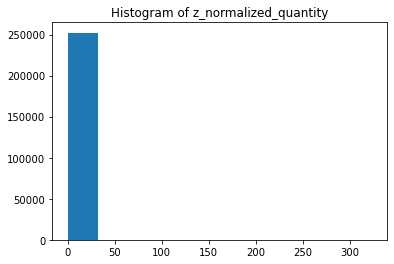

In [28]:
# Create a histogram of the qty_std_Z_byuser column
plt.hist(churn_processed['z_normalized_quantity'])

# Add a title to the histogram
plt.title('Histogram of z_normalized_quantity')

# Show the histogram
plt.show()

In [22]:
# # Convert the quantity column to a NumPy array
# quantity_array = churn['quantity'].to_numpy()
# # Convert the user_id column to a NumPy array
# user_id_array = churn['user_id'].to_numpy()

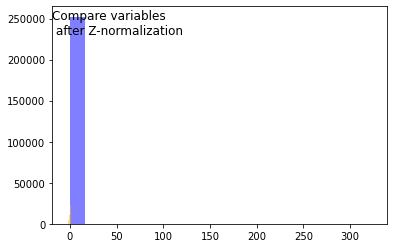

In [31]:
# # Change both variables by Z-Normalization
# qNormZ = (quantity_array - np.mean(quantity_array))/np.std(quantity_array)
# uNormZ = (user_id_array - np.mean(user_id_array))/np.std(user_id_array)
# # Compare the Z-normalized variables by overlaying histograms
# plt.hist(qNormZ, bins = 20, color=[0, 0, 1, 0.5])
# plt.hist(uNormZ, bins = 20, color=[1, 0.7, 0, 0.5])
# plt.title("Compare variables \n after Z-normalization", y=1.0, pad=-28, loc='left')
# plt.show()

In [22]:
# Group the data by user_id
# churn_grouped = churn.groupby('user_id')

In [23]:
# Calculate the mean and standard deviation of the quantity column for each user
# mean_quantity = churn_grouped['quantity'].mean()

In [24]:
# std_quantity = churn_grouped['quantity'].std()

In [25]:

# # Check to make sure that any of the values in the std_quantity variable are not equal to 0
# if std_quantity.any():
#   std_quantity = 1

# # Apply the reset_index() method to each group in the churn_grouped DataFrame
# churn_grouped = churn_grouped.apply(lambda x: x.reset_index().fillna(0))

# # Add a column called 'user_id' to the churn_grouped DataFrame
# churn_grouped = churn_grouped.assign(user_id=churn_grouped.index.to_numpy())

# # Create a new column that is the z-score of the quantity column for each user
# churn_grouped['qty_std_Z_byuser'] = (churn_grouped['quantity'] - mean_quantity) / std_quantity

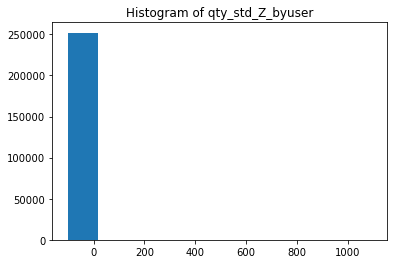

In [27]:
# Create a histogram of the qty_std_Z_byuser column
plt.hist(churn_grouped['qty_std_Z_byuser'])

# Add a title to the histogram
plt.title('Histogram of qty_std_Z_byuser')

# Show the histogram
plt.show()

**What could be the purpose of this normalization?**
<br/>
Add comment here:


7. Convert `item_id` into a category column in `churn_processed`.  Replace the `item_id` of all the items sold only once in the entire data with `"999999"`.  How many item ids are of category `"999999"`?  Display 10 rows of `churn_processed` where `item_id` is category `"999999"`.
<br/>&nbsp;&nbsp;<span style="color:red" float:right>[2 point]</span>

In [ ]:
# Convert item_id into a category column in churn_processed
# Add code here


In [ ]:
# Add code here

# Add Category

#  Replace the item_id of all the items sold only once in the entire data with "999999"   

# How many item ids are of category "999999"

# Display 10 rows of churn_processed where item_id is category 999999


# End of assignment